# Armageddon: solver

## `solver` module
* Solve the system of differential equations describing meteoroid entry
* Calculate the kinetic energy lost per unit altitude
* Compute the burst altitude, burst energy and horizontal path length from the entry point

In [1]:
# import basic requirements
import numpy as np
import matplotlib.pyplot as plt

### Importing `Planet()` class

The class `Planet()` contains functions to solve the system of ordinary differential equations and analyse the outcomes. It consists of three main functions:
* `solve_atmospheric_entry` for intial calculation for the ODE system
* `calculate_energy` for computing the kinetic energy loss
* `analyse_outcome` for computing the burst parameters
* Notice that for `calculate_energy` and `analyse_outcome` to produce reasonable result, the input should be generated by the same `Planet()` instance.

The `__init__` function sets up initial parameters and constants for the target planet, which is Earth in our case.

In [2]:
# import the class within the module and intialise
from armageddon.solver import Planet
earth = Planet()

The next function `solve_atmospheric_entry` is where we solve the system to generate an initial DataFrame with meteroid parameters.

One can choose a method to solve the ODE system as an input for `solve_atmospheric_entry`:
 * [4th-Order Runge Kutta](https://github.com/ese-msc-2022/acs-armageddon-Dimorphos/blob/9d50a1aa4428c2a3cdb85a0d4706cd528aa1b717/armageddon/solver.py#L304-#L373)
 * [Foward-Euler](https://github.com/ese-msc-2022/acs-armageddon-Dimorphos/blob/9d50a1aa4428c2a3cdb85a0d4706cd528aa1b717/armageddon/solver.py#L439-#L512)
 
The function will take a string argument as an input to decide which solving method to use. If none assigned, it will take 'RK4' by default. If the given stepsize is larger than 0.02, it will take 0.02 as an stepsize and interpolate to the desired stepsize that passed in. if the given stepsize is less than 0.02, it will use forward euler since it's faster and stepsize is small enough for forward euler to get an accurate result. The RK4 method utilize two other helper function `RK4_helper` and `calculator_rk4` which can be seen [here](https://github.com/ese-msc-2022/acs-armageddon-Dimorphos/blob/9d50a1aa4428c2a3cdb85a0d4706cd528aa1b717/armageddon/solver.py#L375-#L437).\
The stopping condition for the simulation is the following:
 * Altitude drops below zero
 * Mass drops below zero
 * velocity drops below zero
 * Altitude greater than initial altitude

Using the selected solver, the function will save the solution of the ODE system in a DataFrame with features of the asteroid.

In [5]:
result1 = earth.solve_atmospheric_entry(radius=35, angle=45,
                                       strength=1e7, density=3000,
                                       velocity=19e3)
result1

          velocity          mass      angle       altitude      distance  \
0     19000.000000  5.387831e+08  45.000000  100000.000000      0.000000   
1     19000.346519  5.387831e+08  44.995097   99328.272076    661.441893   
2     19000.692985  5.387831e+08  44.990194   98656.587585   1323.015629   
3     19001.039389  5.387830e+08  44.985289   97984.950169   1984.732227   
4     19001.385736  5.387830e+08  44.980383   97313.356228   2646.580731   
...            ...           ...        ...            ...           ...   
1105     85.070285  8.775432e+07  89.193409      19.445489  97240.990478   
1106     85.046678  8.775428e+07  89.197701      15.192961  97241.050195   
1107     85.023083  8.775425e+07  89.201969      10.941655  97241.109564   
1108     84.999499  8.775421e+07  89.206215       6.691477  97241.168614   
1109     84.975929  8.775417e+07  89.210436       2.442520  97241.227320   

          radius   time  
0      35.000000   0.00  
1      35.000000   0.05  
2      35

,velocity,mass,angle,altitude,distance,radius,time
0,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.00
1,19000.346519,5.387831e+08,44.995097,99328.272076,661.441893,35.000000,0.05
2,19000.692985,5.387831e+08,44.990194,98656.587585,1323.015629,35.000000,0.10
3,19001.039389,5.387830e+08,44.985289,97984.950169,1984.732227,35.000000,0.15
4,19001.385736,5.387830e+08,44.980383,97313.356228,2646.580731,35.000000,0.20
...,...,...,...,...,...,...,...
1105,85.070285,8.775432e+07,89.193409,19.445489,97240.990478,257.488437,55.25
1106,85.046678,8.775428e+07,89.197701,15.192961,97241.050195,257.488437,55.30
1107,85.023083,8.775425e+07,89.201969,10.941655,97241.109564,257.488437,55.35
1108,84.999499,8.775421e+07,89.206215,6.691477,97241.168614,257.488437,55.40


One could visualise the evolution of the asteroid in the atmosphere by plotting some graphs of the asteroid parameters against altitude or time.

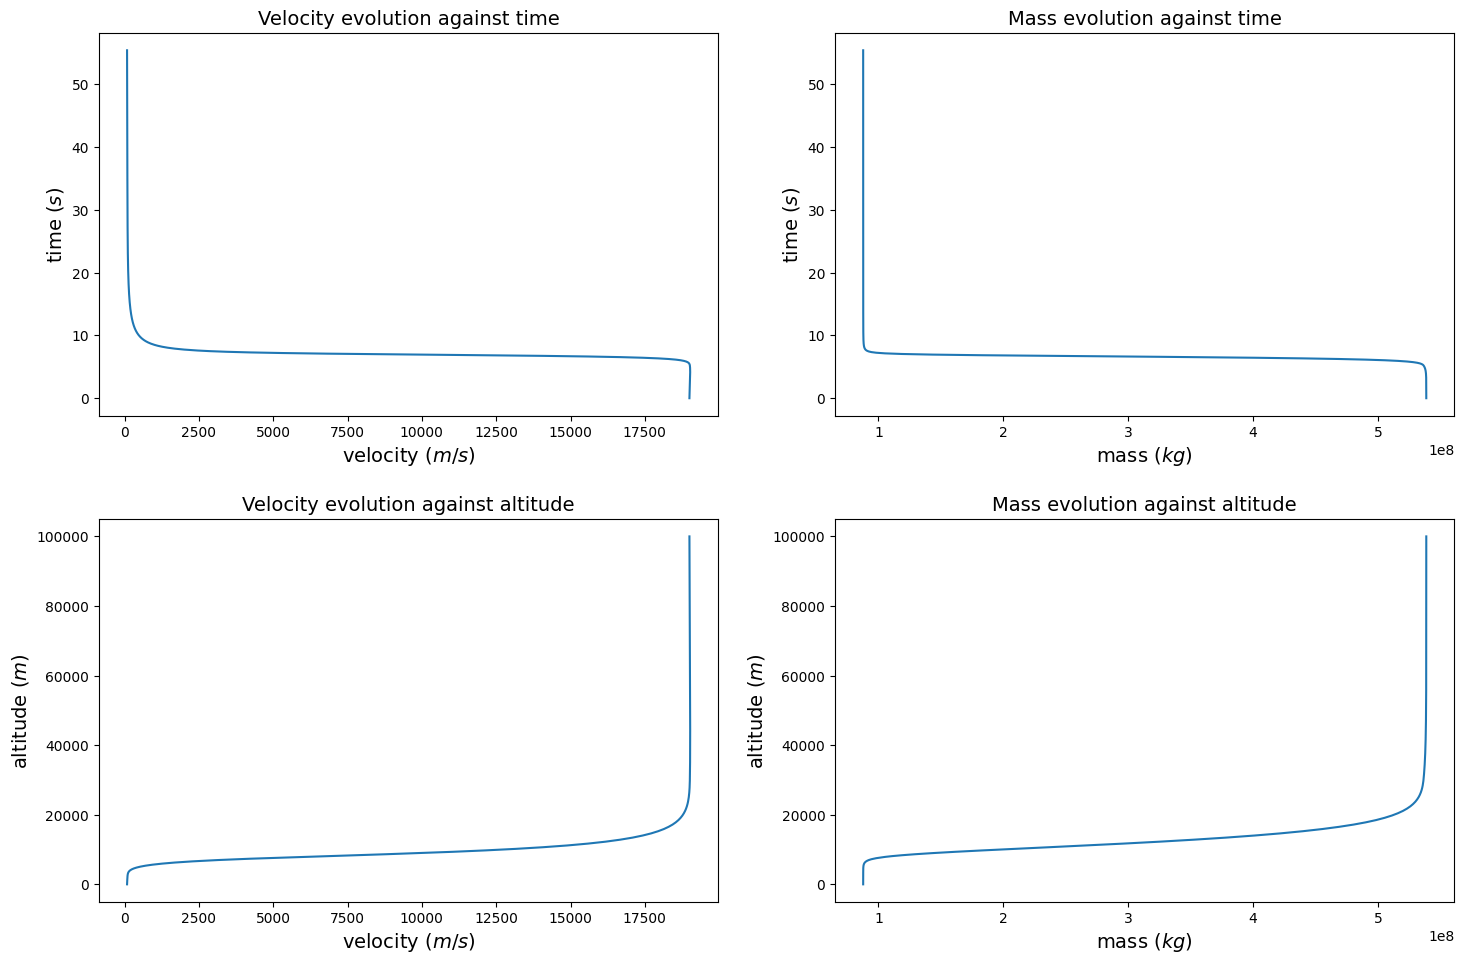

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(result1['velocity'], result1['time'])
ax1.set_ylabel('time $(s)$', fontsize=14)
ax1.set_xlabel('velocity $(m/s)$', fontsize=14)
ax1.set_title('Velocity evolution against time', fontsize=14)

ax2.plot(result1['mass'], result1['time'])
ax2.set_ylabel('time $(s)$', fontsize=14)
ax2.set_xlabel('mass $(kg)$', fontsize=14)
ax2.set_title('Mass evolution against time', fontsize=14)

ax3.plot(result1['velocity'], result1['altitude'])
ax3.set_ylabel('altitude $(m)$', fontsize=14)
ax3.set_xlabel('velocity $(m/s)$', fontsize=14)
ax3.set_title('Velocity evolution against altitude', fontsize=14)

ax4.plot(result1['mass'], result1['altitude'])
ax4.set_ylabel('altitude $(m)$', fontsize=14)
ax4.set_xlabel('mass $(kg)$', fontsize=14)
ax4.set_title('Mass evolution against altitude', fontsize=14)

plt.tight_layout(pad = 2.0)

The next function `calculate_energy` takes the results from `solve_atmospheric_entry` to calculate the kinetic energy loss per unit altitude in kilotons TNT per km. The function returns the same DataFrame as from `solve_atmospheric_entry`, but with an extra column 'dedz' added, where the kinetic energy loss is stored.

In [7]:
result2 = earth.calculate_energy(result1)
result2

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.00,-0.000000
1,19000.346519,5.387831e+08,44.995097,99328.272076,661.441893,35.000000,0.05,-1.260177
2,19000.692985,5.387831e+08,44.990194,98656.587585,1323.015629,35.000000,0.10,-1.259919
3,19001.039389,5.387830e+08,44.985289,97984.950169,1984.732227,35.000000,0.15,-1.259613
4,19001.385736,5.387830e+08,44.980383,97313.356228,2646.580731,35.000000,0.20,-1.259308
...,...,...,...,...,...,...,...,...
1105,85.070285,8.775432e+07,89.193409,19.445489,97240.990478,257.488437,55.25,0.009917
1106,85.046678,8.775428e+07,89.197701,15.192961,97241.050195,257.488437,55.30,0.009912
1107,85.023083,8.775425e+07,89.201969,10.941655,97241.109564,257.488437,55.35,0.009906
1108,84.999499,8.775421e+07,89.206215,6.691477,97241.168614,257.488437,55.40,0.009901


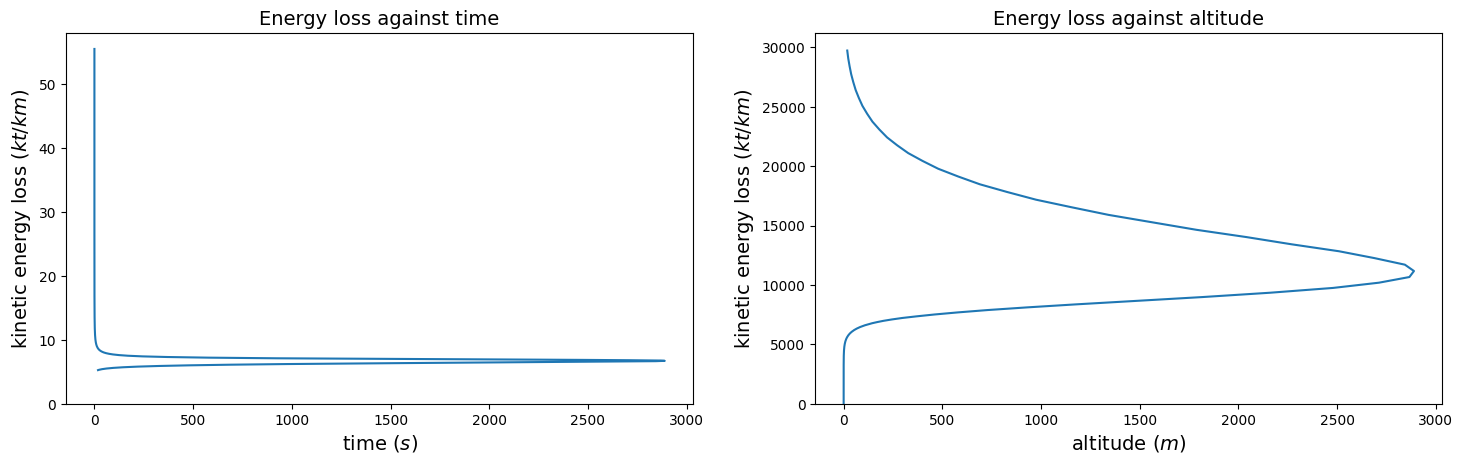

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(result2['dedz'][earth.burstpoint:], result2['time'][earth.burstpoint:])
ax1.set_ylim(ymin=0)
ax1.set_xlabel('time $(s)$', fontsize=14)
ax1.set_ylabel('kinetic energy loss $(kt/km)$', fontsize=14)
ax1.set_title('Energy loss against time', fontsize=14)

ax2.plot(result2['dedz'][earth.burstpoint:], result2['altitude'][earth.burstpoint:])
ax2.set_ylim(ymin=0)
ax2.set_xlabel('altitude $(m)$', fontsize=14)
ax2.set_ylabel('kinetic energy loss $(kt/km)$', fontsize=14)
ax2.set_title('Energy loss against altitude', fontsize=14)

plt.tight_layout(pad = 2.0)

The next function `analyse_outcome` is where we compute the airburst point of the asteroid. This is equivalent to the point at which the peak energy loss per unit height reaches its maximum. An example outcome is displayed below, where each dictionary gives the detail of the impact event. The 'burst_energy' value gives a good estimation of the airburst energy for the total energy deposited into the atmosphere, which can then be used for hazard analysis.

In [22]:
outcome = earth.analyse_outcome(result2)
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 2994.1523510101592,
 'burst_altitude': 10459.247706169299,
 'burst_distance': 89798.00494327919,
 'burst_energy': 16894.541385001165}